# Compare Scores

Load the comparison outputs and surface improvements/regressions.

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

out_dir = Path("comparison_out")
long_df = pd.read_csv(out_dir / "metrics_comparison_long.csv")
wide_df = pd.read_csv(out_dir / "metrics_comparison_wide.csv")

long_df.head()

,model,category,subcategory,metric_name,orig_value,aug_value,delta,delta_pct,orig_error_file_count,orig_error_item_count,aug_error_file_count,aug_error_item_count
0,azure-gpt-4o-FC,live,overall,ast_summary,70.10,68.10,-2.00,-0.028531,6,588,6,601
1,azure-gpt-4o-FC,live,overall,irrelevance_detection,79.41,81.22,1.81,0.022793,6,588,6,601
2,azure-gpt-4o-FC,live,overall,live_overall_acc,70.10,68.10,-2.00,-0.028531,6,588,6,601
3,azure-gpt-4o-FC,live,overall,python_multiple_ast,70.09,68.09,-2.00,-0.028535,6,588,6,601
4,azure-gpt-4o-FC,live,overall,python_parallel_ast,62.50,68.75,6.25,0.100000,6,588,6,601


In [2]:
wide_df.head()

,model,category,subcategory,orig_error_file_count,orig_error_item_count,aug_error_file_count,aug_error_item_count,orig_ast_summary,aug_ast_summary,delta_ast_summary,...,delta_python_simple_ast,orig_rank,aug_rank,delta_rank,orig_relevance_detection,aug_relevance_detection,delta_relevance_detection,orig_simple_ast,aug_simple_ast,delta_simple_ast
0,azure-gpt-4o-FC,live,overall,6,588,6,601,70.10,68.10,-2.00,...,-2.71,1.0,1.0,0.0,87.50,75.0,-12.50,NaN,NaN,NaN
1,azure-gpt-4o-FC,multi_turn,overall,4,461,2,186,NaN,NaN,NaN,...,NaN,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,azure-gpt-4o-FC,non_live,overall,7,199,7,214,84.67,83.79,-0.88,...,-3.00,1.0,1.0,0.0,NaN,NaN,NaN,76.67,74.67,-2.0
3,azure-gpt-5.1-responses-FC,live,overall,6,632,6,662,63.80,60.03,-3.77,...,-10.47,2.0,2.0,0.0,68.75,75.0,6.25,NaN,NaN,NaN
4,azure-gpt-5.1-responses-FC,multi_turn,overall,4,547,1,123,NaN,NaN,NaN,...,NaN,2.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
acc_mask = long_df["category"].str.contains("live", case=False, na=False)
acc_df = long_df[acc_mask].sort_values("delta", ascending=False)
acc_df.head(20)

,model,category,subcategory,metric_name,orig_value,aug_value,delta,delta_pct,orig_error_file_count,orig_error_item_count,aug_error_file_count,aug_error_item_count
28,azure-gpt-5.1-responses-FC,live,overall,python_parallel_ast,56.25,68.75,12.50,0.222222,6,632,6,662
32,azure-gpt-5.1-responses-FC,live,overall,relevance_detection,68.75,75.00,6.25,0.090909,6,632,6,662
4,azure-gpt-4o-FC,live,overall,python_parallel_ast,62.50,68.75,6.25,0.100000,6,588,6,601
25,azure-gpt-5.1-responses-FC,live,overall,irrelevance_detection,84.39,86.65,2.26,0.026780,6,632,6,662
1,azure-gpt-4o-FC,live,overall,irrelevance_detection,79.41,81.22,1.81,0.022793,6,588,6,601
19,azure-gpt-4o-FC,non_live,overall,parallel_ast,90.50,92.00,1.50,0.016575,7,199,7,214
14,azure-gpt-4o-FC,non_live,overall,irrelevance_detection,85.00,85.83,0.83,0.009765,7,199,7,214
38,azure-gpt-5.1-responses-FC,non_live,overall,java_simple_ast,63.00,63.00,0.00,0.000000,7,220,7,272
20,azure-gpt-4o-FC,non_live,overall,parallel_multiple_ast,80.00,80.00,0.00,0.000000,7,199,7,214
31,azure-gpt-5.1-responses-FC,live,overall,rank,2.00,2.00,0.00,0.000000,6,632,6,662


In [8]:
ast_mask = long_df["metric_name"].str.contains("ast", case=False, na=False)
ast_df = long_df[ast_mask].sort_values("delta", ascending=False)
ast_df.head(20)

,model,category,subcategory,metric_name,orig_value,aug_value,delta,delta_pct,orig_error_file_count,orig_error_item_count,aug_error_file_count,aug_error_item_count
28,azure-gpt-5.1-responses-FC,live,overall,python_parallel_ast,56.25,68.75,12.50,0.222222,6,632,6,662
4,azure-gpt-4o-FC,live,overall,python_parallel_ast,62.50,68.75,6.25,0.100000,6,588,6,601
19,azure-gpt-4o-FC,non_live,overall,parallel_ast,90.50,92.00,1.50,0.016575,7,199,7,214
5,azure-gpt-4o-FC,live,overall,python_parallel_multiple_ast,66.67,66.67,0.00,0.000000,6,588,6,601
20,azure-gpt-4o-FC,non_live,overall,parallel_multiple_ast,80.00,80.00,0.00,0.000000,7,199,7,214
38,azure-gpt-5.1-responses-FC,non_live,overall,java_simple_ast,63.00,63.00,0.00,0.000000,7,220,7,272
13,azure-gpt-4o-FC,non_live,overall,ast_summary,84.67,83.79,-0.88,-0.010393,7,199,7,214
15,azure-gpt-4o-FC,non_live,overall,java_simple_ast,66.00,65.00,-1.00,-0.015152,7,199,7,214
0,azure-gpt-4o-FC,live,overall,ast_summary,70.10,68.10,-2.00,-0.028531,6,588,6,601
16,azure-gpt-4o-FC,non_live,overall,javascript_simple_ast,74.00,72.00,-2.00,-0.027027,7,199,7,214


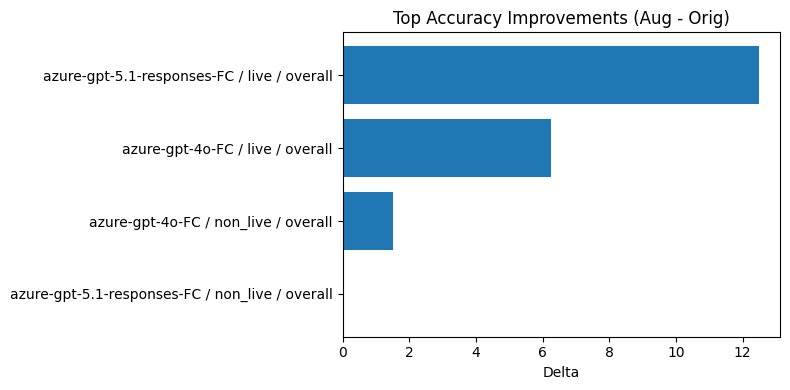

In [11]:
top = acc_df.head(10)
plt.figure(figsize=(8, 4))
plt.barh(
    top["model"] + " / " + top["category"] + " / " + top["subcategory"],
    top["delta"],
)
plt.gca().invert_yaxis()
plt.title("Top Accuracy Improvements (Aug - Orig)")
plt.xlabel("Delta")
plt.tight_layout()
plt.show()

In [14]:
regressions = acc_df.sort_values("delta", ascending=True).head(20)
regressions

,model,category,subcategory,metric_name,orig_value,aug_value,delta,delta_pct,orig_error_file_count,orig_error_item_count,aug_error_file_count,aug_error_item_count
8,azure-gpt-4o-FC,live,overall,relevance_detection,87.50,75.00,-12.50,-0.142857,6,588,6,601
30,azure-gpt-5.1-responses-FC,live,overall,python_simple_ast,66.67,56.20,-10.47,-0.157042,6,632,6,662
29,azure-gpt-5.1-responses-FC,live,overall,python_parallel_multiple_ast,66.67,58.33,-8.34,-0.125094,6,632,6,662
42,azure-gpt-5.1-responses-FC,non_live,overall,parallel_ast,86.50,80.50,-6.00,-0.069364,7,220,7,272
40,azure-gpt-5.1-responses-FC,non_live,overall,multiple_ast,88.50,82.50,-6.00,-0.067797,7,220,7,272
44,azure-gpt-5.1-responses-FC,non_live,overall,python_simple_ast,87.75,82.25,-5.50,-0.062678,7,220,7,272
41,azure-gpt-5.1-responses-FC,non_live,overall,non_live_overall_acc,81.81,77.56,-4.25,-0.051950,7,220,7,272
36,azure-gpt-5.1-responses-FC,non_live,overall,ast_summary,81.81,77.56,-4.25,-0.051950,7,220,7,272
24,azure-gpt-5.1-responses-FC,live,overall,ast_summary,63.80,60.03,-3.77,-0.059091,6,632,6,662
26,azure-gpt-5.1-responses-FC,live,overall,live_overall_acc,63.80,60.03,-3.77,-0.059091,6,632,6,662


In [15]:
from IPython.display import display

for model, df in long_df.groupby("model"):
    print(f"Model: {model}")
    table = df.pivot_table(
        index=["category", "subcategory"],
        columns="metric_name",
        values=["orig_value", "aug_value", "delta"],
        aggfunc="first",
    )
    display(table)

Model: azure-gpt-4o-FC


aug_value                              \
metric_name            ast_summary  base irrelevance_detection   
category   subcategory                                           
live       overall           68.10   NaN                 81.22   
multi_turn overall             NaN  56.0                   NaN   
non_live   overall           83.79   NaN                 85.83   

                                                                               \
metric_name            java_simple_ast javascript_simple_ast live_overall_acc   
category   subcategory                                                          
live       overall                 NaN                   NaN             68.1   
multi_turn overall                 NaN                   NaN              NaN   
non_live   overall                65.0                  72.0              NaN   

                                                                         \
metric_name            long_context multi_turn_overall_acc multiple_ast   
category   subcategory                                                    
live       overall              NaN                    NaN          NaN   
multi_turn overall             51.0                  26.75          NaN   
non_live   overall              NaN                    NaN         88.5   

                                             ...           orig_value  \
metric_name            non_live_overall_acc  ... non_live_overall_acc   
category   subcategory                       ...                        
live       overall                      NaN  ...                  NaN   
multi_turn overall                      NaN  ...                  NaN   
non_live   overall                    83.79  ...                84.67   

                                                                               \
metric_name            parallel_ast parallel_multiple_ast python_multiple_ast   
category   subcategory                                                          
live       overall              NaN                   NaN               70.09   
multi_turn overall              NaN                   NaN                 NaN   
non_live   overall             90.5                  80.0                 NaN   

                                                                         \
metric_name            python_parallel_ast python_parallel_multiple_ast   
category   subcategory                                                    
live       overall                    62.5                        66.67   
multi_turn overall                     NaN                          NaN   
non_live   overall                     NaN                          NaN   

                                                                              
metric_name            python_simple_ast rank relevance_detection simple_ast  
category   subcategory                                                        
live       overall                 70.93  1.0                87.5        NaN  
multi_turn overall                   NaN  1.0                 NaN        NaN  
non_live   overall                 90.00  1.0                 NaN      76.67  

[3 rows x 57 columns]

Model: azure-gpt-5.1-responses-FC


aug_value                              \
metric_name            ast_summary  base irrelevance_detection   
category   subcategory                                           
live       overall           60.03   NaN                 86.65   
multi_turn overall             NaN  38.5                   NaN   
non_live   overall           77.56   NaN                 88.75   

                                                                               \
metric_name            java_simple_ast javascript_simple_ast live_overall_acc   
category   subcategory                                                          
live       overall                 NaN                   NaN            60.03   
multi_turn overall                 NaN                   NaN              NaN   
non_live   overall                63.0                  64.0              NaN   

                                                            \
metric_name            multi_turn_overall_acc multiple_ast   
category   subcategory                                       
live       overall                        NaN          NaN   
multi_turn overall                       9.62          NaN   
non_live   overall                        NaN         82.5   

                                                          ...  \
metric_name            non_live_overall_acc parallel_ast  ...   
category   subcategory                                    ...   
live       overall                      NaN          NaN  ...   
multi_turn overall                      NaN          NaN  ...   
non_live   overall                    77.56         80.5  ...   

                                 orig_value               \
metric_name            non_live_overall_acc parallel_ast   
category   subcategory                                     
live       overall                      NaN          NaN   
multi_turn overall                      NaN          NaN   
non_live   overall                    81.81         86.5   

                                                                  \
metric_name            parallel_multiple_ast python_multiple_ast   
category   subcategory                                             
live       overall                       NaN               63.15   
multi_turn overall                       NaN                 NaN   
non_live   overall                      80.0                 NaN   

                                                                         \
metric_name            python_parallel_ast python_parallel_multiple_ast   
category   subcategory                                                    
live       overall                   56.25                        66.67   
multi_turn overall                     NaN                          NaN   
non_live   overall                     NaN                          NaN   

                                                                              
metric_name            python_simple_ast rank relevance_detection simple_ast  
category   subcategory                                                        
live       overall                 66.67  2.0               68.75        NaN  
multi_turn overall                   NaN  2.0                 NaN        NaN  
non_live   overall                 87.75  2.0                 NaN      72.25  

[3 rows x 54 columns]